In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


In [150]:
df = pd.read_excel('After Split.xlsx',date_parser=['Date'],index_col='Date')
df.head()

,Close Price
Date,
2019-09-19,1101.05
2019-09-20,1199.60
2019-09-23,1257.25
2019-09-24,1253.80
2019-09-25,1239.70


<AxesSubplot:title={'center':'Close Price'}, xlabel='Date'>

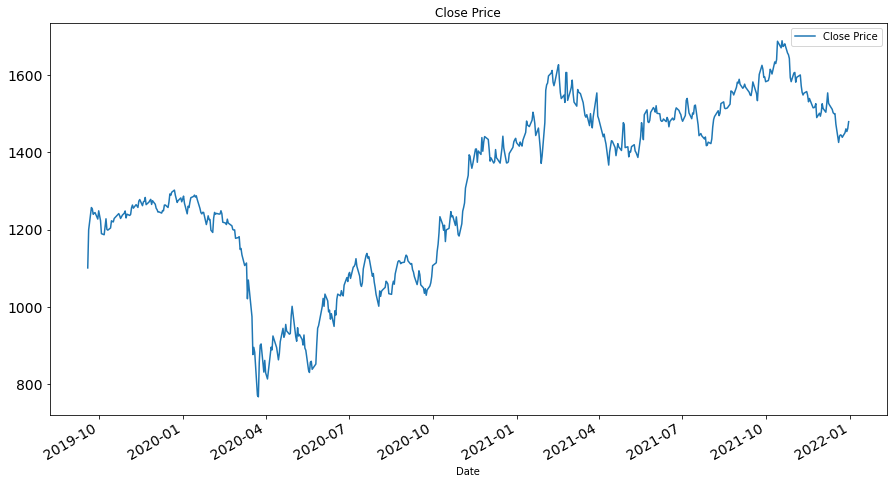

In [151]:
df.plot(figsize=(15,8),title='Close Price', fontsize=14)

In [152]:
train = df[:451]
test = df[451:]

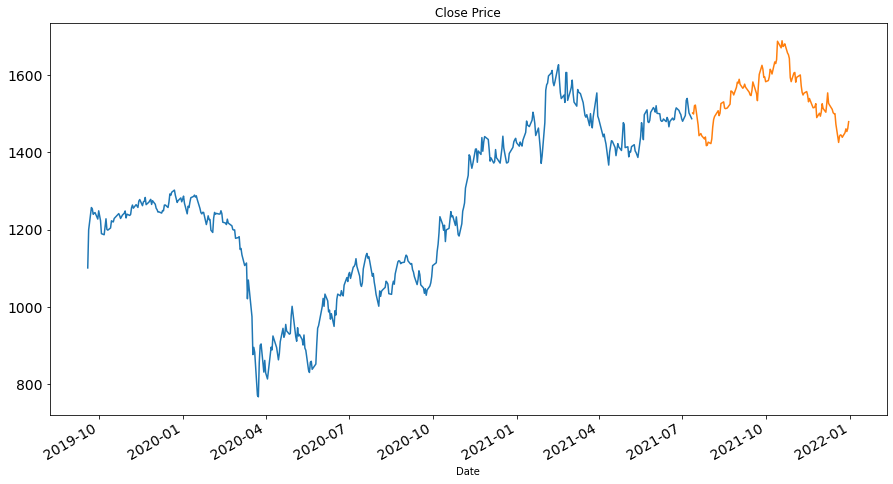

In [153]:
train['Close Price'].plot(figsize=(15,8),title='Close Price', fontsize=14)
test['Close Price'].plot(figsize=(15,8),title='Close Price', fontsize=14)
plt.show()

# Naive Method

In [154]:
dd = np.asarray(train['Close Price'])
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]

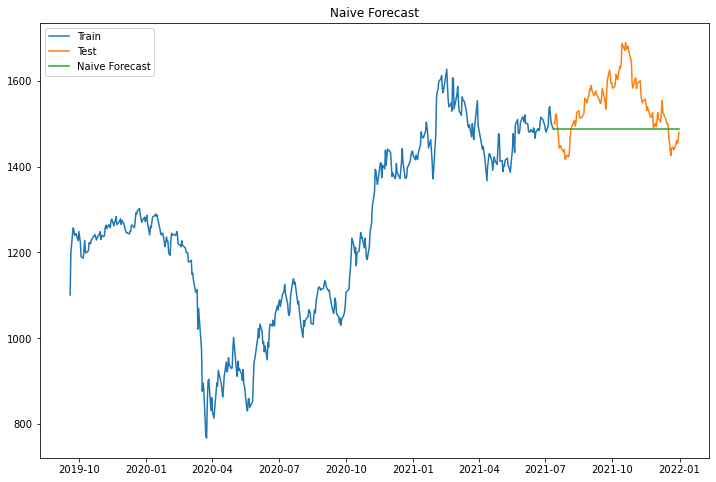

In [155]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Close Price'], label='Train')
plt.plot(test.index,test['Close Price'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [156]:
mse_naive = mean_squared_error(test, y_hat.naive)
print('MSE: '+str(mse_naive))
mae_naive = mean_absolute_error(test, y_hat.naive)
print('MAE: '+str(mae_naive))
rmse_naive = math.sqrt(mean_squared_error(test, y_hat.naive))
print('RMSE: '+str(rmse_naive))

MSE: 7114.858072033897
MAE: 68.89110169491525
RMSE: 84.34961809062266


# Simple Average


In [157]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = test['Close Price'].mean()

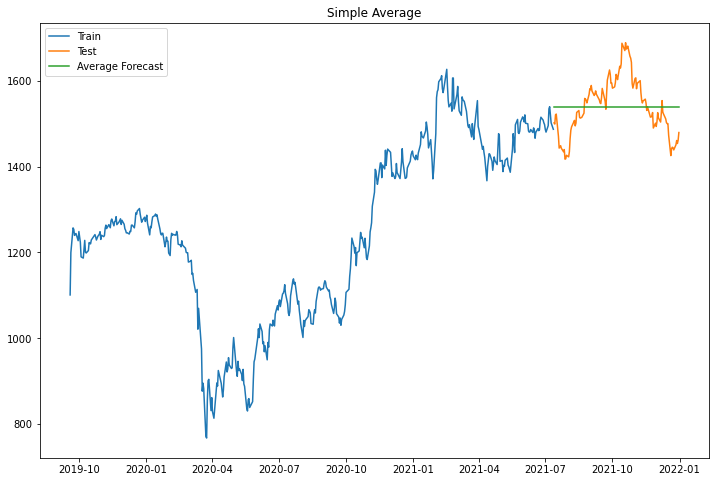

In [158]:
plt.figure(figsize=(12,8))
plt.plot(train['Close Price'], label='Train')
plt.plot(test['Close Price'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average")
plt.show()

In [159]:
mse_sa = mean_squared_error(test, y_hat.naive)
print('MSE: '+str(mse_sa))
mae_sa = mean_absolute_error(test, y_hat.naive)
print('MAE: '+str(mae_sa))
rmse_sa = math.sqrt(mean_squared_error(test, y_hat.naive))
print('RMSE: '+str(rmse_sa))

MSE: 7114.858072033897
MAE: 68.89110169491525
RMSE: 84.34961809062266


# Moving Average

In [160]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = test['Close Price'].rolling(30).mean().iloc[-1]

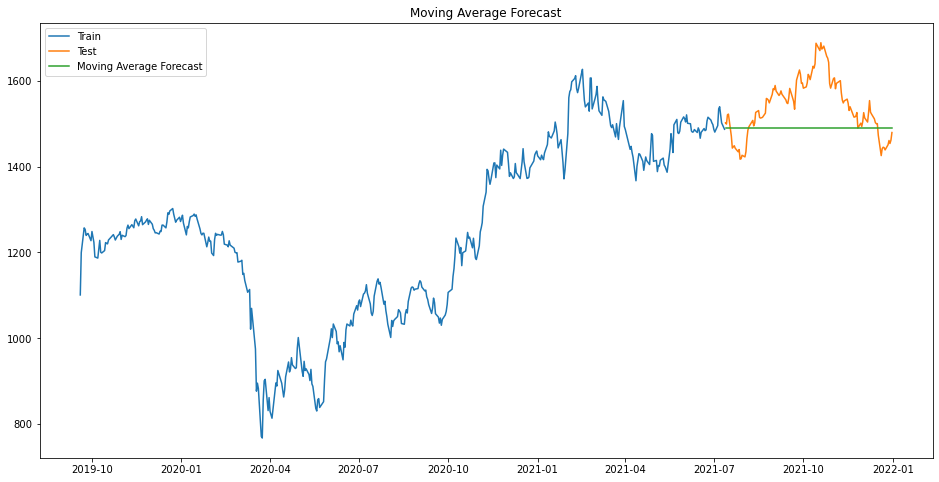

In [161]:
plt.figure(figsize=(16,8))
plt.plot(train['Close Price'], label='Train')
plt.plot(test['Close Price'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title("Moving Average Forecast")
plt.show()

In [162]:
mse_ma = mean_squared_error(test, y_hat_avg['moving_avg_forecast'])
print('MSE: '+str(mse_ma))
mae_ma = mean_absolute_error(test, y_hat_avg['moving_avg_forecast'])
print('MAE: '+str(mae_ma))
rmse_ma = math.sqrt(mean_squared_error(test, y_hat_avg['moving_avg_forecast']))
print('RMSE: '+str(rmse_ma))

MSE: 6726.594465630892
MAE: 66.63290960451981
RMSE: 82.01581838664352


# Simple Exponential Smoothing

In [163]:
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Close Price'])).fit(smoothing_level=0.7,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))

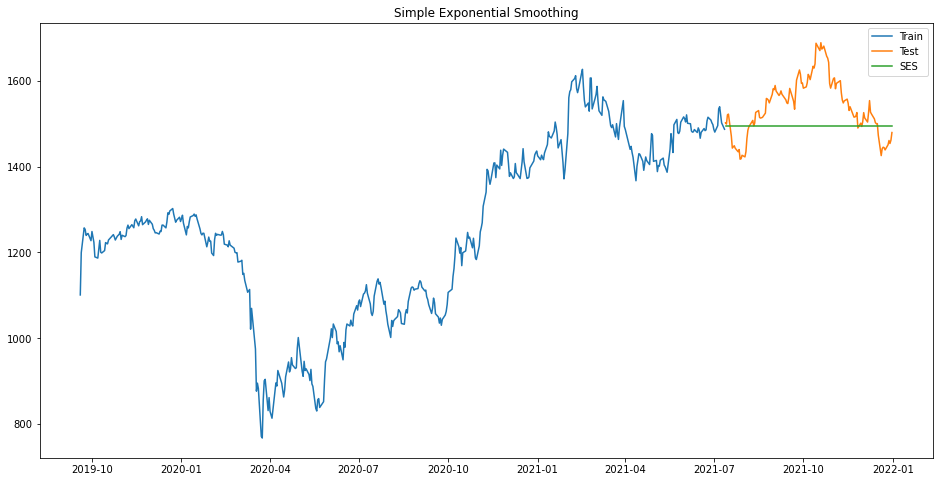

In [164]:
plt.figure(figsize=(16,8))
plt.plot(train['Close Price'], label='Train')
plt.plot(test['Close Price'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing")
plt.savefig('SES.png')

In [165]:
mse_ses = mean_squared_error(test, y_hat_avg['SES'])
print('MSE: '+str(mse_ses))
mae_ses = mean_absolute_error(test,y_hat_avg['SES'])
print('MAE: '+str(mae_ses))
rmse_ses = math.sqrt(mean_squared_error(test, y_hat_avg['SES']))
print('RMSE: '+str(rmse_ses))

MSE: 6470.897086067794
MAE: 65.09277091690018
RMSE: 80.44188639053533


# Holt’s Linear Trend method

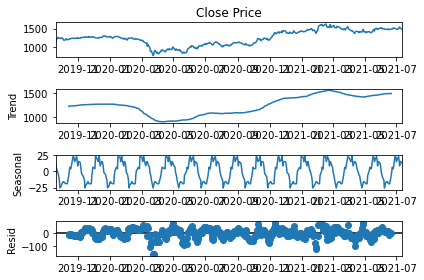

In [166]:
sm.tsa.seasonal_decompose(train['Close Price'],period=30).plot()
result = sm.tsa.stattools.adfuller(train['Close Price'])
plt.show()

In [167]:
result

(-0.9799016588409383,
 0.7605239500892791,
 7,
 443,
 {'1%': -3.4451978474132234,
  '5%': -2.8680864144212057,
  '10%': -2.5702569996789792},
 3994.5723508651436)

In [168]:
y_hat_avg = test.copy()
fit1 = Holt(np.asarray(train['Close Price']),exponential=True).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

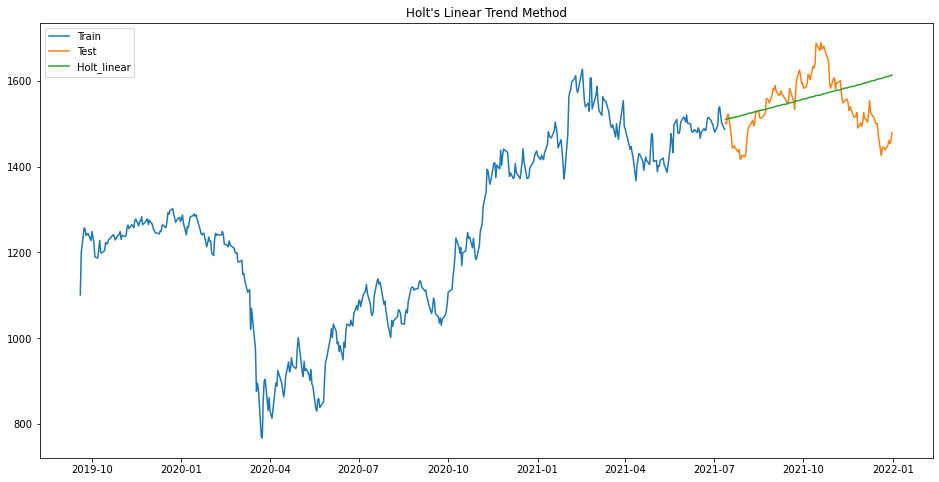

In [169]:
plt.figure(figsize=(16,8))
plt.plot(train['Close Price'], label='Train')
plt.plot(test['Close Price'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.title("Holt's Linear Trend Method")
plt.savefig("HoltsLinear Method.png")

In [170]:
mse_hl = mean_squared_error(test, y_hat_avg['Holt_linear'])
print('MSE: '+str(mse_hl))
mae_hl = mean_absolute_error(test,y_hat_avg['Holt_linear'])
print('MAE: '+str(mae_hl))
rmse_hl = math.sqrt(mean_squared_error(test, y_hat_avg['Holt_linear']))
print('RMSE: '+str(rmse_hl))

MSE: 5502.8094235741655
MAE: 59.22037101331194
RMSE: 74.18092358264465


#  Holt-Winters Method

In [171]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Close Price']) ,seasonal_periods=30 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

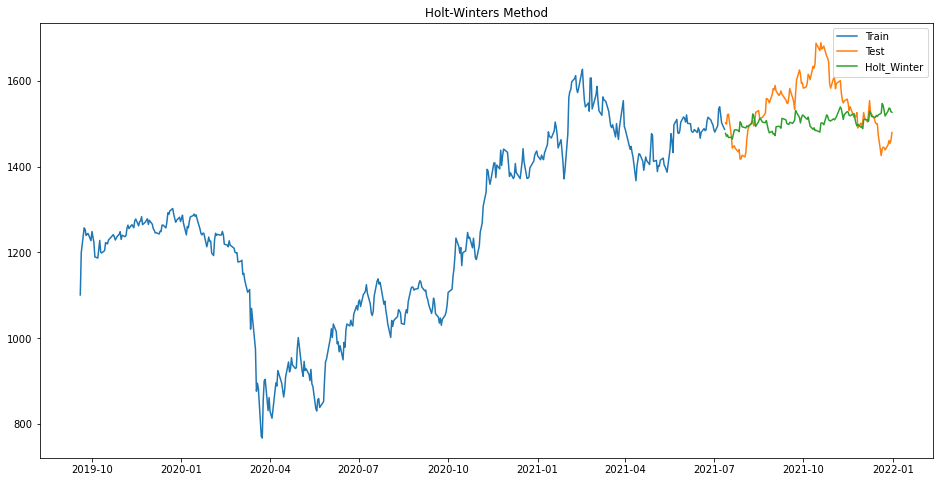

In [173]:
plt.figure(figsize=(16,8))
plt.plot( train['Close Price'], label='Train')
plt.plot(test['Close Price'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.title("Holt-Winters Method")
plt.savefig('Holt-Winter.png')

In [174]:
mse_hw = mean_squared_error(test, y_hat_avg['Holt_Winter'])
print('MSE: '+str(mse_hw))
mae_hw= mean_absolute_error(test,y_hat_avg['Holt_Winter'])
print('MAE: '+str(mae_hw))
rmse_hw = math.sqrt(mean_squared_error(test, y_hat_avg['Holt_Winter']))
print('RMSE: '+str(rmse_hw))

MSE: 5972.892797299315
MAE: 61.073021852130644
RMSE: 77.28449260556296


# Score Card

In [175]:
cols = ['Model_Name', 'MSE', 'RMSE', 'MAE']
Score_Card = pd.DataFrame(columns = cols)

In [176]:
naive = pd.Series({'Model_Name': "Naive Approach",
                     'MSE': mse_naive,
                     'RMSE': rmse_naive,
                     'MAE':mae_naive
                   })

In [177]:
Score_Card = Score_Card.append(naive,ignore_index=True)

In [178]:
sa = pd.Series({'Model_Name': "Simple Average",
                     'MSE': mse_sa,
                     'RMSE': rmse_sa,
                     'MAE':mae_sa
                   })

In [179]:
Score_Card = Score_Card.append(sa,ignore_index=True)

In [180]:
ma = pd.Series({'Model_Name': "Moving Average",
                     'MSE': mse_ma,
                     'RMSE': rmse_ma,
                     'MAE':mae_ma
                   })

In [181]:
Score_Card = Score_Card.append(ma,ignore_index=True)

In [182]:
ses = pd.Series({'Model_Name': "Simple Exponential Smoothing",
                     'MSE': mse_ses,
                     'RMSE': rmse_ses,
                     'MAE':mae_ses
                   })

In [183]:
Score_Card = Score_Card.append(ses,ignore_index=True)

In [184]:
hl = pd.Series({'Model_Name': "Holt’s Linear Trend method",
                     'MSE': mse_hl,
                     'RMSE': rmse_hl,
                     'MAE':mae_hl
                   })

In [185]:
Score_Card = Score_Card.append(hl,ignore_index=True)

In [186]:
hw = pd.Series({'Model_Name': "Holt’s Winter method",
                     'MSE': mse_hw,
                     'RMSE': rmse_hw,
                     'MAE':mae_hw
                   })

In [187]:
Score_Card = Score_Card.append(hw,ignore_index=True)

In [188]:
Score_Card.set_index('Model_Name',inplace=True)

In [189]:
Score_Card

,MSE,RMSE,MAE
Model_Name,,,
Naive Approach,7114.858072,84.349618,68.891102
Simple Average,7114.858072,84.349618,68.891102
Moving Average,6726.594466,82.015818,66.632910
Simple Exponential Smoothing,6470.897086,80.441886,65.092771
Holt’s Linear Trend method,5502.809424,74.180924,59.220371
Holt’s Winter method,5972.892797,77.284493,61.073022
